<a href="https://colab.research.google.com/github/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/main_solving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install func_timeout
from func_timeout import func_timeout, FunctionTimedOut

In [0]:
!wget "https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/common.py" -O "common.py"
from common import *

--2020-01-27 18:51:06--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4100 (4.0K) [text/plain]
Saving to: ‘common.py’

common.py           100%[===================>]   4.00K  --.-KB/s    in 0s      

2020-01-27 18:51:06 (73.2 MB/s) - ‘common.py’ saved [4100/4100]



In [0]:
!pip install dlx
!wget "https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/solving_dlx.py" -O "solving_dlx.py"
from solving_dlx import *

--2020-01-27 18:51:10--  https://raw.githubusercontent.com/uol-mediaprocessing/group-projects-sudoku-solver/master/definitions/solving_dlx.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4871 (4.8K) [text/plain]
Saving to: ‘solving_dlx.py’

solving_dlx.py      100%[===================>]   4.76K  --.-KB/s    in 0s      

2020-01-27 18:51:10 (85.3 MB/s) - ‘solving_dlx.py’ saved [4871/4871]



In [0]:
!cp "./drive/My Drive/sudoku_acquisition_output.bz2" "./sudoku_acquisition_output.bz2"
acquisition_output = pd.read_pickle("./sudoku_acquisition_output.bz2")
acquisition_output

,input_image,input_digits,input_classes,training
input_filename,,,,
./v2_train/image169.jpg,"[[[164, 161, 118], [164, 161, 118], [164, 161,...","[[8, 3, 0, 0, 0, 7, 9, 0, 0], [0, 0, 0, 0, 3, ...","[[1, 1, 0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 1, ...",False
./v2_train/image72.jpg,"[[[169, 168, 147], [169, 168, 147], [169, 168,...","[[0, 7, 1, 9, 0, 2, 0, 5, 0], [0, 0, 0, 0, 0, ...","[[0, 1, 1, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, ...",False
./v2_train/image1066.jpg,"[[[147, 143, 147], [147, 142, 146], [146, 142,...","[[1, 0, 0, 0, 0, 0, 0, 0, 0], [2, 6, 0, 1, 5, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, ...",True
./v2_train/image1087.jpg,"[[[47, 41, 41], [47, 43, 42], [49, 45, 42], [4...","[[0, 0, 2, 0, 0, 9, 1, 0, 5], [0, 8, 0, 7, 0, ...","[[0, 0, 1, 0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 0, ...",True
./v2_train/image204.jpg,"[[[153, 146, 92], [154, 147, 95], [156, 148, 9...","[[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...","[[0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, ...",False
...,...,...,...,...
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165358878.jpg,"[[[78, 76, 79], [77, 75, 78], [76, 74, 77], [7...","[[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...","[[2, 2, 2, 2, 2, 2, 1, 2, 1], [1, 2, 2, 2, 2, ...",True
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165329872.jpg,"[[[133, 127, 105], [131, 125, 103], [131, 125,...","[[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...","[[2, 2, 2, 2, 2, 2, 1, 2, 1], [1, 2, 2, 2, 2, ...",True
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165402379.jpg,"[[[50, 50, 50], [51, 51, 51], [50, 50, 50], [4...","[[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...","[[2, 2, 2, 2, 2, 2, 1, 2, 1], [1, 2, 2, 2, 2, ...",True


In [0]:
!cp "./drive/My Drive/sudoku_recognition_output.bz2" "./sudoku_recognition_output.bz2"
recognition_output = pd.read_pickle("./sudoku_recognition_output.bz2")
recognition_output

recog_x  ... recog_digit
input_filename                                     cell_row cell_col                                                     ...            
./v2_train/image1066.jpg                           0        0         [[[0.7819253206253052], [0.8023571968078613], ...  ...           1
                                                            1         [[[0.7680047154426575], [0.7727128267288208], ...  ...           0
                                                            2         [[[0.7785589694976807], [0.77138352394104], [0...  ...           0
                                                            3         [[[0.8188650608062744], [0.7931247353553772], ...  ...           0
                                                            4         [[[0.7862745523452759], [0.7933723330497742], ...  ...           0
...                                                                                                                 ...  ...         ...
./sudoku_dataset_1024/train_247994761_full/IMG_... 8        4         [[[0.31910640001296997], [0.31970661878585815]...  ...           3
                                                            5         [[[0.30957135558128357], [0.32087087631225586]...  ...           6
                                                            6         [[[0.40741172432899475], [0.4083595871925354],...  ...           3
                                                            7         [[[0.3238820433616638], [0.35426172614097595],...  ...           7
                                                            8         [[[0.5234681367874146], [0.4145033359527588], ...  ...           8

[17658 rows x 3 columns]

In [0]:
acquired_index = acquisition_output.index
recognized_index = recognition_output.index.get_level_values(0).unique()
index = acquired_index.intersection(recognized_index)
index

Index(['./v2_train/image1066.jpg', './v2_train/image1087.jpg',
       './v2_train/image204.jpg', './v2_train/image1075.jpg',
       './v2_train/image1020.jpg', './v2_train/image1078.jpg',
       './v2_train/image1004.jpg', './v2_train/image1076.jpg',
       './v2_train/image1022.jpg', './v2_train/image177.jpg',
       ...
       './sudoku_dataset_1024/train_623574918_empty/IMG_8753.JPG',
       './sudoku_dataset_1024/train_623574918_empty/IMG_8754.JPG',
       './sudoku_dataset_1024/train_623574918_empty/IMG_8762.JPG',
       './sudoku_dataset_1024/train_623574918_empty/IMG_8765.JPG',
       './sudoku_dataset_1024/train_247994761_full/IMG_20200115_165349409.jpg',
       './sudoku_dataset_1024/train_247994761_full/IMG_20200115_165336189.jpg',
       './sudoku_dataset_1024/train_247994761_full/IMG_20200115_165410544.jpg',
       './sudoku_dataset_1024/train_247994761_full/IMG_20200115_165358878.jpg',
       './sudoku_dataset_1024/train_247994761_full/IMG_20200115_165329872.jpg',
       '

In [0]:
dataset = acquisition_output.loc[index].copy()
dataset

,input_image,input_digits,input_classes,training
input_filename,,,,
./v2_train/image1066.jpg,"[[[147, 143, 147], [147, 142, 146], [146, 142,...","[[1, 0, 0, 0, 0, 0, 0, 0, 0], [2, 6, 0, 1, 5, ...","[[1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, ...",True
./v2_train/image1087.jpg,"[[[47, 41, 41], [47, 43, 42], [49, 45, 42], [4...","[[0, 0, 2, 0, 0, 9, 1, 0, 5], [0, 8, 0, 7, 0, ...","[[0, 0, 1, 0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 0, ...",True
./v2_train/image204.jpg,"[[[153, 146, 92], [154, 147, 95], [156, 148, 9...","[[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...","[[0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, ...",False
./v2_train/image1075.jpg,"[[[183, 171, 155], [182, 170, 154], [181, 169,...","[[3, 0, 0, 0, 9, 0, 0, 0, 2], [0, 1, 0, 0, 0, ...","[[1, 0, 0, 0, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, ...",True
./v2_train/image1020.jpg,"[[[208, 210, 200], [210, 212, 202], [211, 212,...","[[9, 7, 0, 0, 0, 2, 0, 0, 0], [1, 0, 8, 0, 0, ...","[[1, 1, 0, 0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 0, ...",True
...,...,...,...,...
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165336189.jpg,"[[[112, 110, 89], [106, 104, 83], [105, 103, 8...","[[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...","[[2, 2, 2, 2, 2, 2, 1, 2, 1], [1, 2, 2, 2, 2, ...",True
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165410544.jpg,"[[[39, 41, 38], [47, 49, 46], [50, 52, 49], [4...","[[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...","[[2, 2, 2, 2, 2, 2, 1, 2, 1], [1, 2, 2, 2, 2, ...",True
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165358878.jpg,"[[[78, 76, 79], [77, 75, 78], [76, 74, 77], [7...","[[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...","[[2, 2, 2, 2, 2, 2, 1, 2, 1], [1, 2, 2, 2, 2, ...",True


# Introduction

The previous step gave us a prediction of what digits are contained in each Sudoku cell.
Based on that information we can ask a dedicated Sudoku solver to solve the puzzle for us.
What a time to be alive.

![Solver Visualization](https://github.com/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/documentation/solver.png?raw=true)

# Reconstructing the grid

From the raw predictions we first have to reconstruct a grid data structure that can easily be fed into a generic Sudoku solver algorithm.

In [0]:
def get_grid(df, filename, n_rows=9, n_cols=9):
  grid = np.zeros((n_rows, n_cols), "uint8")
  for i_row in range(n_rows):
    for i_col in range(n_cols):
      grid[i_row, i_col] = df.loc[filename, i_row, i_col]["recog_digit"]
  return grid

dataset["recog_digits"] = [get_grid(recognition_output, filename) for filename in dataset.index]
dataset["recog_digits"]

input_filename
./v2_train/image1066.jpg                                                 [[1, 0, 0, 0, 0, 0, 0, 0, 0], [2, 6, 0, 1, 5, ...
./v2_train/image1087.jpg                                                 [[0, 0, 2, 0, 0, 9, 1, 0, 5], [0, 8, 0, 7, 0, ...
./v2_train/image204.jpg                                                  [[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...
./v2_train/image1075.jpg                                                 [[3, 0, 0, 0, 9, 0, 0, 0, 2], [0, 1, 0, 0, 0, ...
./v2_train/image1020.jpg                                                 [[9, 7, 0, 0, 0, 2, 0, 0, 0], [1, 0, 8, 0, 0, ...
                                                                                               ...                        
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165336189.jpg    [[2, 4, 7, 5, 9, 4, 7, 6, 1], [8, 7, 6, 0, 6, ...
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165410544.jpg    [[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...
.

These are examples for recognized puzzles and the actual ground truth:

In [0]:
examples = dataset.sample(n=4)
print("Ground Truth")
print_grids(examples["input_digits"])
print("Recognition")
print_grids(examples["recog_digits"])

Ground Truth
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
| 4 |   |   | 8 |   | 2 |   |   | 6 | |   |   |   |   |   |   | 7 |   | 1 | |   |   | 9 | 7 |   |   |   | 3 | 1 | | 2 | 3 | 4 | 5 | 9 | 8 | 1 | 7 | 6 |
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
|   | 6 |   |   | 1 |   |   | 4 |   | | 8 |   |   |   |   |   |   |   | 9 | | 3 |   |   | 4 |   |   |   |   |   | | 7 | 9 | 6 | 3 | 4 | 1 | 5 | 8 | 2 |
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
|   | 3 | 8 |   |   |   | 1 | 7 |   | |   |   |   | 5 | 7 | 4 | 8 |   |   | |   | 2 |   |   |   |   |   |   |   | | 5 | 1 | 8 | 6 | 7 | 2 | 9 | 3 | 4 |
------------------------------------- -------------------------------------

# Solving

We initially used a simple brute-force solver that tried every possible solution.
Although quite simple to understand, it was very inefficient and slow.
With regards to real-time capabilities we decided to use a quite advanced algorithm based on Donald Knuth's Algorithm X that we found [on the internet](https://codegolf.stackexchange.com/questions/190727/the-fastest-sudoku-solver).
The actual implementation has its own [GitHub repository](https://github.com/jjallan/sudoku) which we wrapped within a custom method [`solve(...)`](https://github.com/uol-mediaprocessing/group-projects-sudoku-solver/blob/master/definitions/solving_dlx.py).
Still, some puzzles may be very hard to solve and take a lot of time.
Thus we limit the maximum search time to 10 seconds using the [`func_timeout`](https://pypi.org/project/func-timeout/) module.

In [0]:
solved_grids = []
for filename, grid in zip(dataset.index, dataset["recog_digits"]):
  print("Solving grid '%s'... " % filename, end="")
  
  try:
    solved = func_timeout(10.0, solve, args=(grid,))
  except FunctionTimedOut:
    print("Timeout! ", end="")
    solved = False
  except Exception as e:
    print(str(e) + "! ", end="")
    solved = False

  if solved is not False:
    print("Solved!")
    solved_grids.append(solved)
  else:
    print("Unable to solve!")
    solved_grids.append(None)
dataset["solved_digits"] = solved_grids
dataset["solved_digits"]

Solving grid './v2_train/image1066.jpg'... Solved!
Solving grid './v2_train/image1087.jpg'... Solved!
Solving grid './v2_train/image204.jpg'... Solved!
Solving grid './v2_train/image1075.jpg'... Solved!
Solving grid './v2_train/image1020.jpg'... Solved!
Solving grid './v2_train/image1078.jpg'... Solved!
Solving grid './v2_train/image1004.jpg'... Solved!
Solving grid './v2_train/image1076.jpg'... Solved!
Solving grid './v2_train/image1022.jpg'... Solved!
Solving grid './v2_train/image177.jpg'... Solved!
Solving grid './v2_train/image1086.jpg'... Solved!
Solving grid './v2_train/image1008.jpg'... Solved!
Solving grid './v2_train/image1062.jpg'... Solved!
Solving grid './v2_train/image202.jpg'... Solved!
Solving grid './v2_train/image1006.jpg'... Solved!
Solving grid './v2_train/image1007.jpg'... Solved!
Solving grid './v2_train/image206.jpg'... Solved!
Solving grid './v2_train/image1081.jpg'... Solved!
Solving grid './v2_train/image10.jpg'... Solved!
Solving grid './v2_train/image1077.jp

input_filename
./v2_train/image1066.jpg                                                 [[1, 4, 5, 2, 3, 9, 6, 8, 7], [2, 6, 8, 1, 5, ...
./v2_train/image1087.jpg                                                 [[6, 3, 2, 4, 8, 9, 1, 7, 5], [1, 8, 5, 7, 2, ...
./v2_train/image204.jpg                                                  [[4, 1, 3, 6, 5, 8, 2, 9, 7], [5, 7, 6, 9, 4, ...
./v2_train/image1075.jpg                                                 [[3, 5, 7, 4, 9, 6, 8, 1, 2], [2, 1, 8, 3, 5, ...
./v2_train/image1020.jpg                                                 [[9, 7, 3, 4, 1, 2, 6, 5, 8], [1, 5, 8, 3, 7, ...
                                                                                               ...                        
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165336189.jpg                                                 None
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165410544.jpg    [[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...
.

In [0]:
n_solved = len(dataset[dataset["solved_digits"].notnull()])
n_unsolved = len(dataset[dataset["solved_digits"].isnull()])
print("I was able to solve %d out of %d puzzles!" % (n_solved, n_solved + n_unsolved))

I was able to solve 163 out of 218 puzzles!


# Examples

In [0]:
examples = dataset[dataset["training"] == False]

## Successfully solved

[0]: ./sudoku_dataset_1024/test_163792845_full/IMG_20200115_160043652.jpg
[1]: ./v2_train/image1067.jpg
[2]: ./sudoku_dataset_1024/test_163792845_empty/IMG_8797.JPG
[3]: ./sudoku_dataset_1024/test_163792845_empty/IMG_8805.JPG


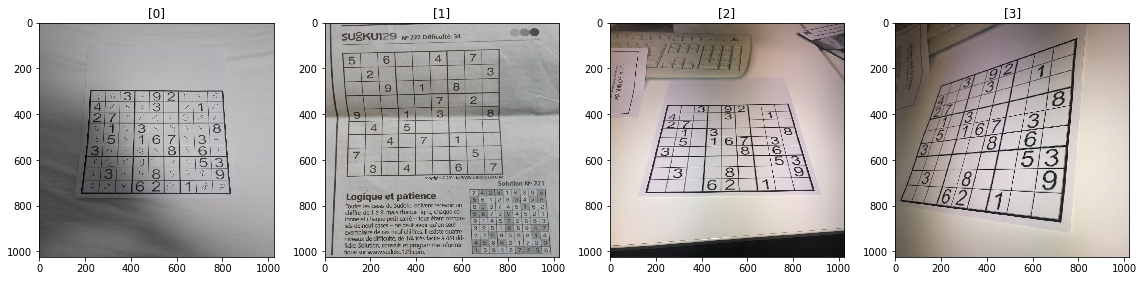

Ground Truth
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
| 1 | 6 | 3 | 7 | 9 | 2 | 8 | 4 | 5 | | 5 |   | 6 |   |   | 4 |   | 7 |   | |   |   | 3 |   | 9 | 2 |   |   |   | |   |   | 3 |   | 9 | 2 |   |   |   |
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
| 4 | 8 | 9 | 5 | 3 | 6 | 7 | 1 | 2 | |   | 2 |   |   |   |   |   |   | 3 | | 4 |   |   |   | 3 |   |   | 1 |   | | 4 |   |   |   | 3 |   |   | 1 |   |
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
| 2 | 7 | 5 | 8 | 1 | 4 | 3 | 9 | 6 | |   |   | 9 |   | 1 |   | 8 |   |   | | 2 | 7 |   |   |   |   |   |   |   | | 2 | 7 |   |   |   |   |   |   |   |
------------------------------------- -------------------------------------

In [0]:
subset = examples[examples["solved_digits"].notnull()].sample(n=4)
for i in range(len(subset)):
  print("[%d]: %s" % (i, subset.index[i]))
show_images(subset["input_image"], rows=1, scaling=(4, 4))
print("Ground Truth")
print_grids(subset["input_digits"])
print("Recognized")
print_grids(subset["recog_digits"])
print("Solved")
print_grids(subset["solved_digits"])

## Failed to solve

[0]: ./sudoku_dataset_1024/test_149567823_empty/IMG_8818.JPG
[1]: ./sudoku_dataset_1024/test_149567823_empty/IMG_8815.JPG
[2]: ./sudoku_dataset_1024/test_149567823_empty/IMG_8816.JPG
[3]: ./sudoku_dataset_1024/test_324823921_full/19-12-11 14-23-25 8909.jpg


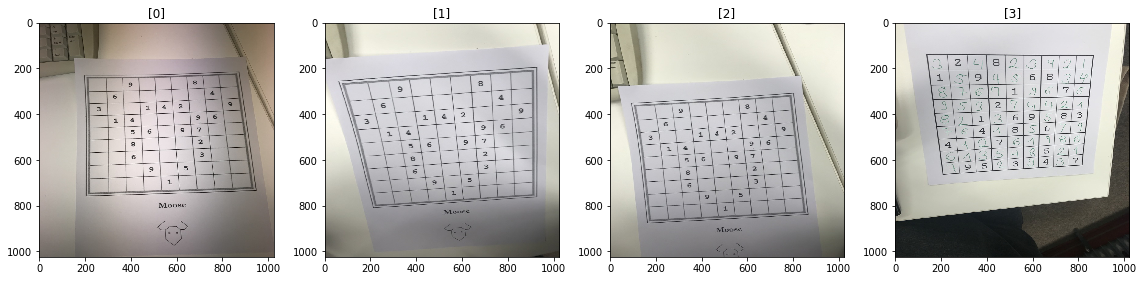

Ground Truth
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
|   |   | 9 |   |   |   | 8 |   |   | |   |   | 9 |   |   |   | 8 |   |   | |   |   | 9 |   |   |   | 8 |   |   | | 3 | 2 | 4 | 8 | 2 | 3 | 9 | 2 | 1 |
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
|   | 6 |   |   |   |   |   | 4 |   | |   | 6 |   |   |   |   |   | 4 |   | |   | 6 |   |   |   |   |   | 4 |   | | 1 | 5 | 9 | 4 | 5 | 6 | 8 | 3 | 4 |
------------------------------------- ------------------------------------- ------------------------------------- -------------------------------------
| 3 |   |   | 1 | 4 | 2 |   |   | 9 | | 3 |   |   | 1 | 4 | 2 |   |   | 9 | | 3 |   |   | 1 | 4 | 2 |   |   | 9 | | 8 | 7 | 6 | 7 | 1 | 9 | 6 | 7 | 5 |
------------------------------------- -------------------------------------

In [0]:
subset = examples[examples["solved_digits"].isnull()].sample(n=4)
for i in range(len(subset)):
  print("[%d]: %s" % (i, subset.index[i]))
show_images(subset["input_image"], rows=1, scaling=(4, 4))
print("Ground Truth")
print_grids(subset["input_digits"])
print("Recognized")
print_grids(subset["recog_digits"])
#print("Solved")
#print_grids(subset["solved_digits"])

## Incorrectly recognized

In [0]:
for filename, actual, recognized in zip(examples.index, examples["input_digits"], examples["recog_digits"]):
  correct = np.all(actual == recognized)
  if correct:
    print("Sudoku '%s' has been correctly recognized!" % filename)
  else:
    print("Sudoku '%s' has been NOT correctly recognized!" % filename)
    print_grids([actual, recognized])

Sudoku './v2_train/image204.jpg' has been correctly recognized!
Sudoku './v2_train/image1078.jpg' has been correctly recognized!
Sudoku './v2_train/image177.jpg' has been correctly recognized!
Sudoku './v2_train/image1086.jpg' has been correctly recognized!
Sudoku './v2_train/image1008.jpg' has been correctly recognized!
Sudoku './v2_train/image10.jpg' has been correctly recognized!
Sudoku './v2_train/image1045.jpg' has been correctly recognized!
Sudoku './v2_train/image1082.jpg' has been correctly recognized!
Sudoku './v2_train/image1067.jpg' has been correctly recognized!
Sudoku './v2_train/image1011.jpg' has been NOT correctly recognized!
------------------------------------- -------------------------------------
| 7 |   | 5 |   |   | 4 |   |   | 2 | | 7 |   | 5 |   |   | 4 |   |   | 2 |
------------------------------------- -------------------------------------
|   | 9 |   |   | 3 |   |   | 6 |   | |   | 9 |   |   | 3 |   |   | 6 |   |
------------------------------------- --------

# Export

Whatever solution we found will be exported.
Sudokus where we did not find any solution wont be included.

In [0]:
df = dataset[dataset["solved_digits"].notnull()]
df = df[["recog_digits", "solved_digits"]]
df.columns = ["solve_input", "solve_output"]
df

,solve_input,solve_output
input_filename,,
./v2_train/image1066.jpg,"[[1, 0, 0, 0, 0, 0, 0, 0, 0], [2, 6, 0, 1, 5, ...","[[1, 4, 5, 2, 3, 9, 6, 8, 7], [2, 6, 8, 1, 5, ..."
./v2_train/image1087.jpg,"[[0, 0, 2, 0, 0, 9, 1, 0, 5], [0, 8, 0, 7, 0, ...","[[6, 3, 2, 4, 8, 9, 1, 7, 5], [1, 8, 5, 7, 2, ..."
./v2_train/image204.jpg,"[[0, 1, 3, 0, 0, 0, 0, 0, 0], [0, 0, 6, 0, 4, ...","[[4, 1, 3, 6, 5, 8, 2, 9, 7], [5, 7, 6, 9, 4, ..."
./v2_train/image1075.jpg,"[[3, 0, 0, 0, 9, 0, 0, 0, 2], [0, 1, 0, 0, 0, ...","[[3, 5, 7, 4, 9, 6, 8, 1, 2], [2, 1, 8, 3, 5, ..."
./v2_train/image1020.jpg,"[[9, 7, 0, 0, 0, 2, 0, 0, 0], [1, 0, 8, 0, 0, ...","[[9, 7, 3, 4, 1, 2, 6, 5, 8], [1, 5, 8, 3, 7, ..."
...,...,...
./sudoku_dataset_1024/train_623574918_empty/IMG_8762.JPG,"[[0, 2, 3, 0, 0, 4, 0, 0, 0], [8, 0, 5, 0, 0, ...","[[6, 2, 3, 5, 7, 4, 9, 1, 8], [8, 7, 5, 3, 9, ..."
./sudoku_dataset_1024/train_623574918_empty/IMG_8765.JPG,"[[0, 2, 3, 0, 0, 4, 0, 0, 0], [8, 0, 5, 0, 0, ...","[[6, 2, 3, 5, 7, 4, 9, 1, 8], [8, 7, 5, 3, 9, ..."
./sudoku_dataset_1024/train_247994761_full/IMG_20200115_165410544.jpg,"[[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ...","[[2, 4, 7, 9, 9, 4, 7, 6, 1], [8, 7, 6, 2, 6, ..."


In [0]:
df.to_pickle("./sudoku_solve_output.bz2")

In [0]:
!cp "./sudoku_solve_output.bz2" "./drive/My Drive/sudoku_solve_output.bz2"